In [19]:
import os #directory set korar jonno+ interaction with OS
import cv2  #load & process images
import matplotlib.pyplot as plt #visualization
import tensorflow as tf #ML stuffs
import keras #high-level neural networks API
import numpy as np #arrays and data
import pandas as pd

In [3]:
mnist = tf.keras.datasets.mnist #directly getting the datasets from mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data() 
#x hocche pixelated value and y is classifications

Preprocessing by normalizations

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
#axis=0 for row and 1 for column

Creating the model..


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax')) #output layer tai 10units of neuron


Compiling the model..

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training the model..

In [7]:
model.fit(x_train, y_train, epochs = 3) #epochs is basically an iteration

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2660 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1079 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0739 - accuracy: 0.9768


In [8]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


Loading the model aafter being saved..

In [9]:
model = tf.keras.models.load_model('handwritten.model')
#until now uporer code likha lagbena if we save it. Simply LOAD!

In [10]:
loss,accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9722
0.09245564788579941
0.9721999764442444


Testing the model..

error
error
error
1/1 [==============================] - 0s 25ms/step
the digit is probably a 5


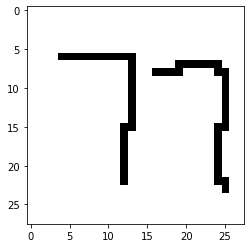

1/1 [==============================] - 0s 28ms/step
the digit is probably a 7


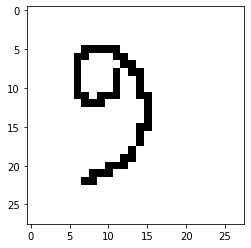

1/1 [==============================] - 0s 28ms/step
the digit is probably a 8


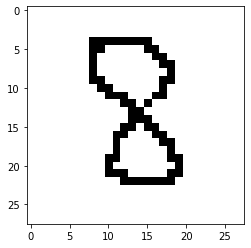

1/1 [==============================] - 0s 26ms/step
the digit is probably a 0


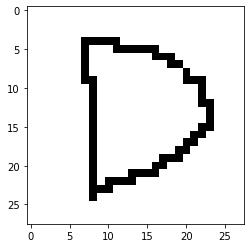

In [18]:
image_number=1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"the digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("error")
    finally:
        image_number+=1